In [ ]:
pip install pandas scikit-learn jupyter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline


In [ ]:
data = pd.read_csv('/content/Healthcare_dataset.xlsx - Dataset.csv')
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
tmp = pd.get_dummies(data['Persistency_Flag'], drop_first=True).astype(int)
tmp.head()

,Persistent
0,1
1,0
2,0
3,0
4,0


In [ ]:
data['Persistency_Flag']=tmp
data.head(3)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,0,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,0,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2


In [ ]:
data.isnull().any()

Ptid                              False
Persistency_Flag                  False
Gender                            False
Race                              False
Ethnicity                         False
                                  ...  
Risk_Hysterectomy_Oophorectomy    False
Risk_Estrogen_Deficiency          False
Risk_Immobilization               False
Risk_Recurring_Falls              False
Count_Of_Risks                    False
Length: 69, dtype: bool

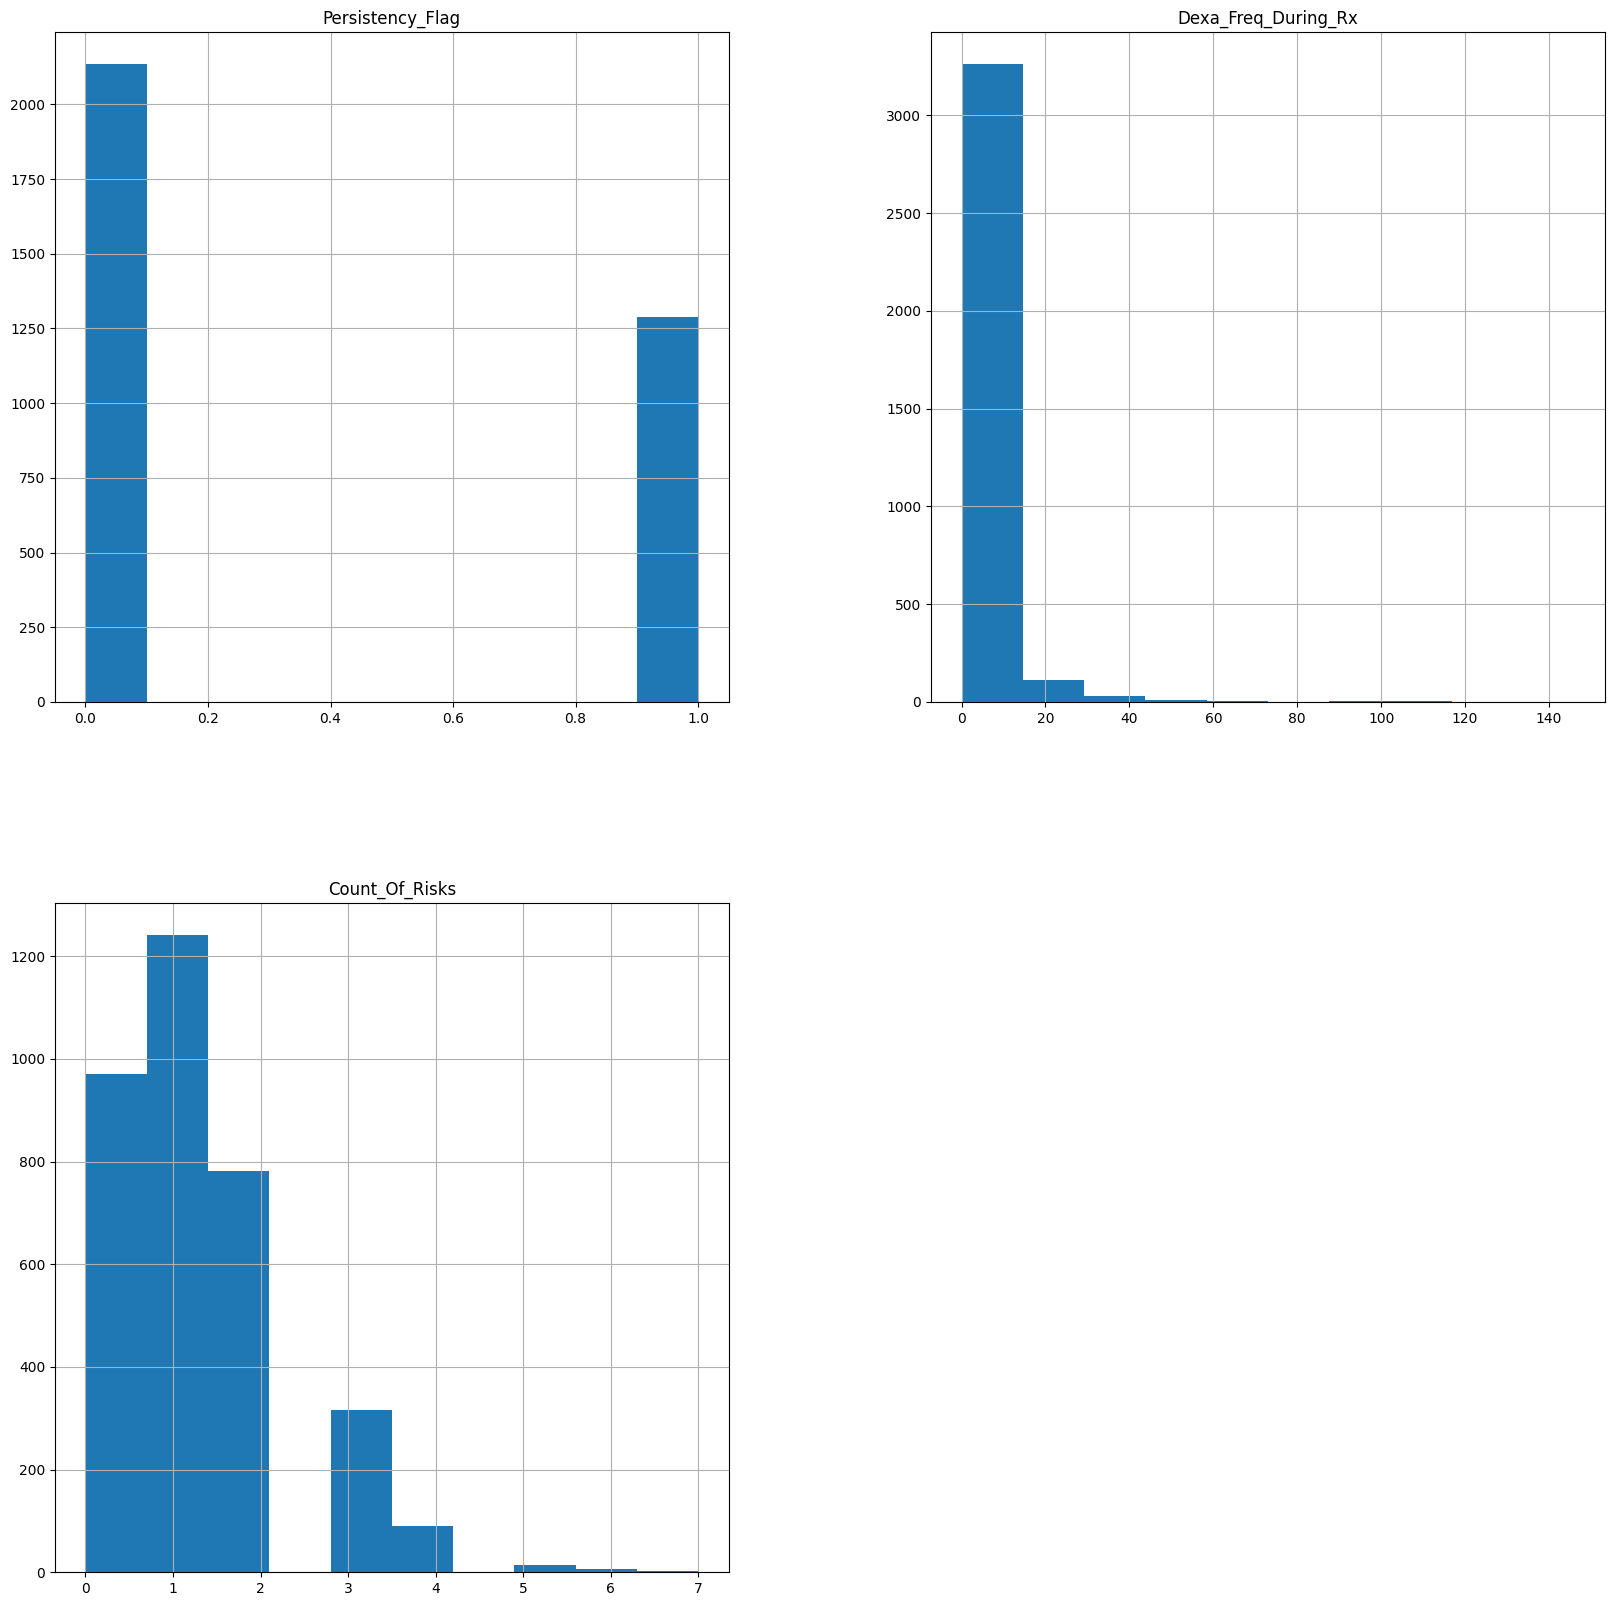

In [ ]:
# exploring the distribution of the numerical variables
data.hist(figsize=(20,20))
plt.show()

Text(0, 0.5, 'Number of people')

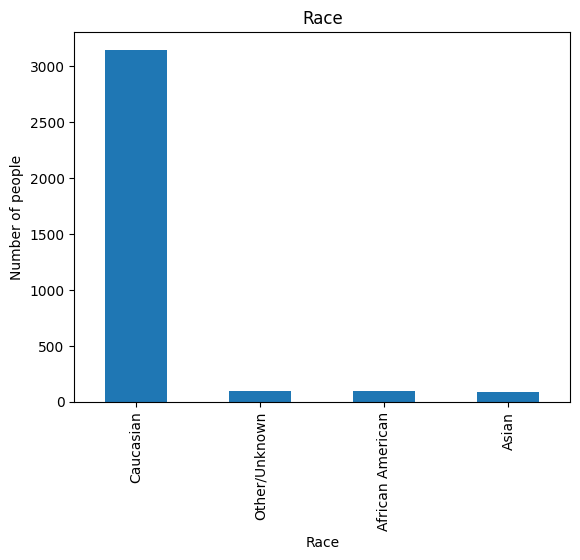

In [ ]:
# this code counts the number of observations(Race) within each category and then a plots a bar plot.
fig = data['Race'].value_counts().plot.bar()
fig.set_title('Race')
fig.set_ylabel('Number of people')

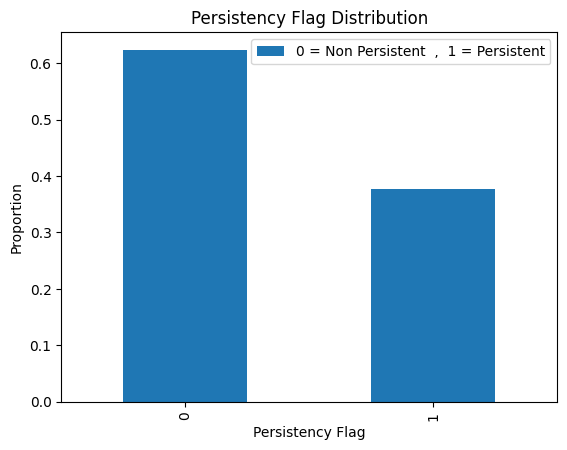

In [ ]:
fig = data['Persistency_Flag'].value_counts(normalize=True).plot.bar()
plt.title('Persistency Flag Distribution')
plt.xlabel('Persistency Flag')
plt.ylabel('Proportion')
plt.legend(['0 = Non Persistent''  ,  ' '1 = Persistent'])

Text(0, 0.5, 'Number of people')

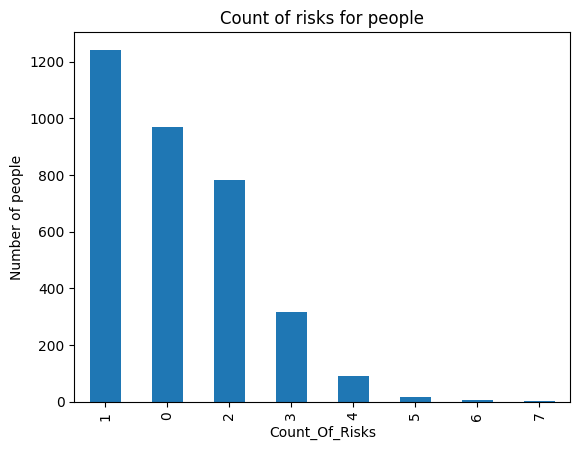

In [ ]:
# Following code creates a bar plot of the number of people and the number of risks
fig = data['Count_Of_Risks'].value_counts().plot.bar()
fig.set_title('Count of risks for people')
fig.set_ylabel('Number of people')

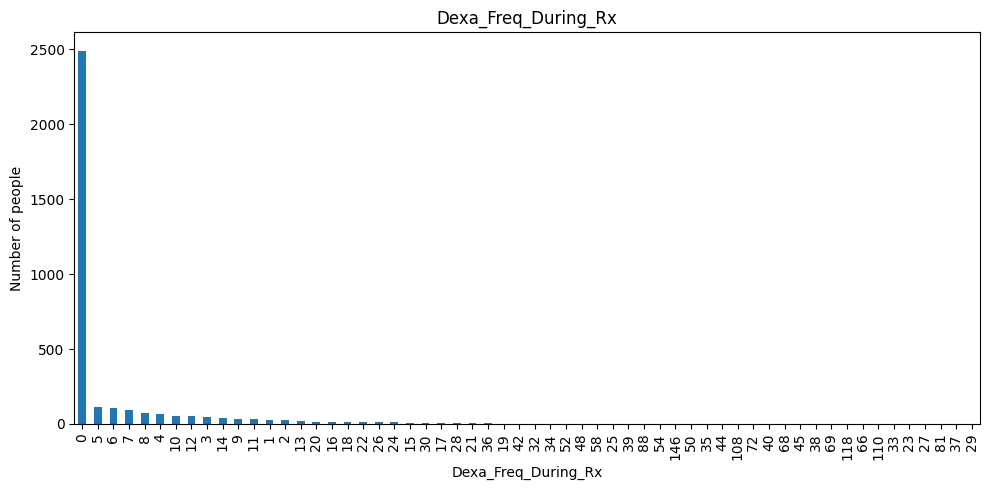

In [ ]:
fig = data['Dexa_Freq_During_Rx'].value_counts().plot.bar(figsize=(10, 5))
fig.set_title('Dexa_Freq_During_Rx')
fig.set_ylabel('Number of people')
plt.tight_layout()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   int64 
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [ ]:
data.describe()

,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000,3424.000000
mean,0.376460,3.016063,1.239486
std,0.484568,8.136545,1.094914
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,3.000000,2.000000
max,1.000000,146.000000,7.000000


In [ ]:
data.dtypes

Ptid                              object
Persistency_Flag                   int64
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [ ]:
# exploring variable values
for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

Ptid ['P1' 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' 'P8' 'P9' 'P10' 'P11' 'P12' 'P13'
 'P14' 'P15' 'P16' 'P17' 'P18' 'P19' 'P20'] 

Persistency_Flag [1 0] 

Gender ['Male' 'Female'] 

Race ['Caucasian' 'Asian' 'Other/Unknown' 'African American'] 

Ethnicity ['Not Hispanic' 'Hispanic' 'Unknown'] 

Region ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast'] 

Age_Bucket ['>75' '55-65' '65-75' '<55'] 

Ntm_Speciality ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE'] 

Ntm_Specialist_Flag ['Others' 'Specialist'] 

Ntm_Speciality_Bucket ['OB/GYN/Others/PCP/Unknown' 'Endo/Onc/Uro' 'Rheum'] 

Gluco_Record_Prior_Ntm ['N' 'Y'] 

Gluco_Record_During_Rx ['N' 'Y'] 

Dex

In [ ]:
# List of variables  types
# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Persistent' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Non-Persistent' and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' ]

print('The number of discrete variables is    {}'.format(len(categorical)))
print('The number of continuous variables is  {}'.format(len(continuous)))
print('The number of categorical variables is {}'.format(len(discrete)))

The number of discrete variables is    66
The number of continuous variables is  1
The number of categorical variables is 2


In [ ]:
categorical

['Ptid',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_D

In [ ]:
continuous

['Dexa_Freq_During_Rx']

In [ ]:
discrete

['Persistency_Flag', 'Count_Of_Risks']

In [ ]:
data = data.replace('Unknown', np.nan)
data = data.replace('Other/Unknown', np.nan)

In [ ]:
data.isnull().sum()

Ptid                               0
Persistency_Flag                   0
Gender                             0
Race                              97
Ethnicity                         91
                                  ..
Risk_Hysterectomy_Oophorectomy     0
Risk_Estrogen_Deficiency           0
Risk_Immobilization                0
Risk_Recurring_Falls               0
Count_Of_Risks                     0
Length: 69, dtype: int64

In [ ]:
# determinig variables with missing values
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

['Race',
 'Ethnicity',
 'Region',
 'Ntm_Speciality',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment']

In [ ]:
# determining whether they are numerical or categorical
data[vars_with_na].dtypes

Race                       object
Ethnicity                  object
Region                     object
Ntm_Speciality             object
Risk_Segment_During_Rx     object
Tscore_Bucket_During_Rx    object
Change_T_Score             object
Change_Risk_Segment        object
dtype: object

In [ ]:
# Inspecting the variables with missing data
data[vars_with_na].head(15)

,Race,Ethnicity,Region,Ntm_Speciality,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment
0,Caucasian,Not Hispanic,West,GENERAL PRACTITIONER,VLR_LR,<=-2.5,No change,NaN
1,Asian,Not Hispanic,West,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
2,NaN,Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
3,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
4,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
5,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
6,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
7,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
8,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
9,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN


In [ ]:
# determining percentage of observations missing per variable
# calculate the percentage of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas
data_na = data[vars_with_na].isnull().mean()

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# add column names to the dataframe
data_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)
data_na

,variable,na_percentage
7,Change_Risk_Segment,0.650993
4,Risk_Segment_During_Rx,0.437208
5,Tscore_Bucket_During_Rx,0.437208
6,Change_T_Score,0.437208
3,Ntm_Speciality,0.090537
0,Race,0.028329
1,Ethnicity,0.026577
2,Region,0.017523
